<a href="https://colab.research.google.com/github/negashaz/DataMining-/blob/main/hierarchical%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#source: https://www.kaggle.com/datasets/crawford/1000-cameras-dataset?resource=download
data = pd.read_csv("camera_dataset.csv")
data.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [3]:
data.columns

Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


In [5]:
#count the number of missing values in each row and column
data.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

In [6]:
data.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


In [7]:
#reducing the amount of dataset to two columns
x_data = data [["Max resolution", "Price"]]
x_data.head()

,Max resolution,Price
0,1024.0,179.0
1,1280.0,179.0
2,640.0,179.0
3,1152.0,269.0
4,1152.0,1299.0


In [8]:
#saving the files as csv
x_data.to_csv('camera_dataset_reduced.csv')

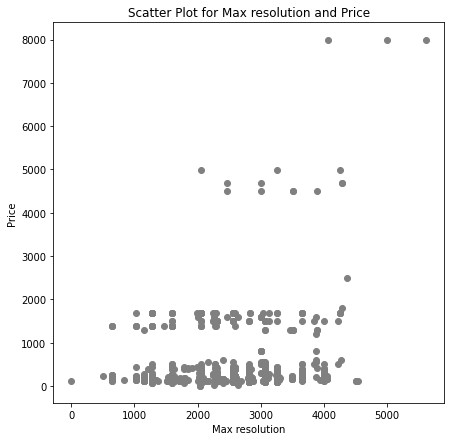

In [9]:
#a sample scatter plot for the dataset
plt.figure(figsize = (7,7))
plt.scatter(x_data["Max resolution"], x_data["Price"], color = 'Grey')
plt.title('Scatter Plot for Max resolution and Price')
plt.xlabel('Max resolution')
plt.ylabel('Price')
plt.show()

In [10]:
#re-valuing the current numeric attributes into a range between 1 and 0
from sklearn.preprocessing import normalize
data_scaled = normalize(x_data)
data_scaled = pd.DataFrame(data_scaled, columns=x_data.columns)
data_scaled.head()

,Max resolution,Price
0,0.985063,0.172194
1,0.990363,0.138496
2,0.963042,0.269351
3,0.973804,0.227390
4,0.663505,0.748171


In [11]:
#saving the files as csv
x_data.to_csv('camera_dataset_normalized.csv')

In [12]:
#converting the scaled data to a numpy array
my_array = data_scaled.to_numpy()
print(my_array)

[[0.98506312 0.17219365]
 [0.99036298 0.13849607]
 [0.96304212 0.26935084]
 ...
 [0.99954207 0.03025957]
 [0.99966649 0.02582472]
 [0.99676556 0.08036422]]


**Constructing a Dendrogram** 

The sole concept of hierarchical clustering lies in the construction and analysis of a dendrogram. Unlike K-means Clustering while constructing hierarchical clustering we do not keep any assumption of the number of the number of clusters.

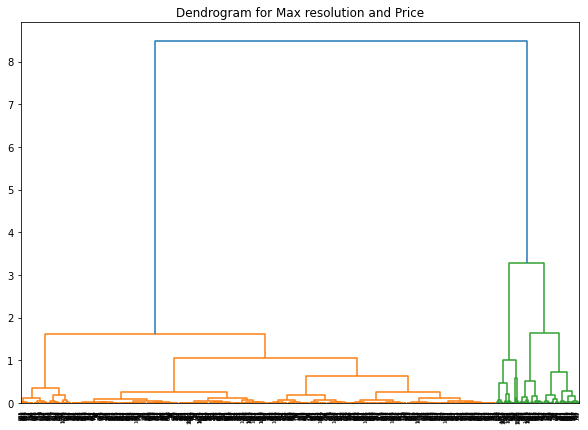

In [13]:
#creating a dendrogram using SciPy
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram for Max resolution and Price")  
dend = shc.dendrogram(shc.linkage(my_array, method='ward'))

After the dendogram has been constructed, we slice the structure horizontally. And all the resulting child branches formed below the horizontal cut represent an individual cluster at the highest level in the system and will define the associated cluster membership for each data sample. While this is the case, there is always an option to increase/decrease the granularity level of clustering. 


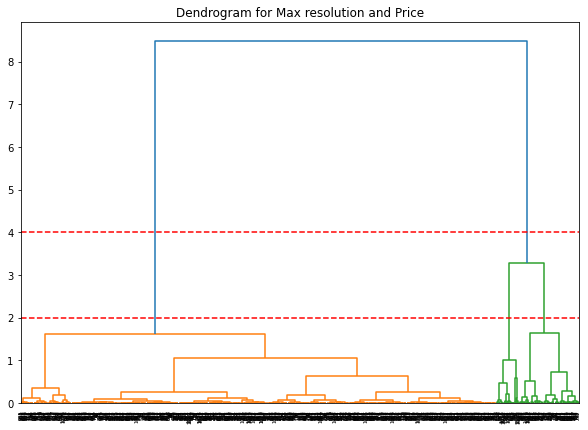

In [14]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram for Max resolution and Price")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
#for a y value of 4
plt.axhline(y=4, color='r', linestyle='--')
#for a y value of 2
plt.axhline(y=2, color='r', linestyle='--')

In [15]:
'''
The current dataset used for this program only contains 1000 points but is able to run on a larger 
number of points. We didn't have the computing power to process 5000 points and above. 

If required, we have attached the orignal dataset selected for this assignment as a comment
in the cells below and we can assure that the program will definitely work.

'''

'''
data = pd.read_csv("Churn_Modelling.csv")
x_data = data [["Age", "CreditScore"]]
'''

'\ndata = pd.read_csv("Churn_Modelling.csv")\nx_data = data [["Age", "CreditScore"]]\n'

In [16]:
#the reduced dataset before normalization
x_data.head()

,Max resolution,Price
0,1024.0,179.0
1,1280.0,179.0
2,640.0,179.0
3,1152.0,269.0
4,1152.0,1299.0


In [17]:
#converting the selected dataset into a numpy array 
data_array = x_data.to_numpy()
print(data_array)

[[1024.  179.]
 [1280.  179.]
 [ 640.  179.]
 ...
 [2048.   62.]
 [2400.   62.]
 [1600.  129.]]


We will be using **Agglomerative clustering** instead of Divisive clustering. In this algorithm goes as follows:


*   We will start by assigning each item to its own cluster. Hence, for n items in the dataset, there will be n number of clusters with each cluster containing an item
*   Next up, we will find the closest pair of clusters. In other words take the distance between the centroids of these clusters with points having the least distance will be referred to as similar points and we can merge them.

*   Afterwards, we need to compute the distance between the nuew clusters and each of the old clusters. 
*   Finally repeat the last two steps until all the item are clustered into a single cluster of size n


In [18]:
import sys
from sklearn.metrics.pairwise import pairwise_distances
from numpy import linalg as LA
from sklearn import datasets 
import scipy as sp


def agglomerative_clustering(data_array, linkage, number_of_clusters):
  #calculating the initial distance matrix
  #takes the input vector array and computes the distance
  #source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances 
  #and make all the diagonal elements of the matrix infinity
  distance_matrix = pairwise_distances(data_array, metric = 'euclidean')
  np.fill_diagonal(distance_matrix, sys.maxsize)

  #finding the cluster from linkage
  #using a self-defined function
  clusters = choice_of_cluster(distance_matrix,linkage) 

  #plotting the clusters
  no_of_iter = distance_matrix.shape[0] - number_of_clusters
  clusters_to_plot = clusters[no_of_iter]

  #find the unique elements of the array
  unique_array = np.unique(clusters_to_plot)
    
  plot_index = []
  fig = plt.figure(figsize=(10,10))
  fig.suptitle("Agglomerative Cluster Plot, Linkage: " + str(linkage) +"& Number of Cluster: "+ str(number_of_clusters))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('Max_res')
  ax.set_ylabel('Price')

  #iterating over the array
  for x in np.nditer(unique_array):
        plot_index.append(np.where(clusters_to_plot==x))
  
  x = 0
  colors = ['r','g','k','y','c','m','b','w']
  for i in range(0, len(plot_index)):
    for j in np.nditer(plot_index[i]):
      ax.scatter(data_array[j,0], data_array[j,1], c = colors[x])
    x += 1
  
  #plot the cluster
  plt.show


**Linkages**

Linkages distance is directly proportional to similarity between clusters. Inorder to create merger between the clusters, we can utilize the following methods:

**Single Linkage:**
Single linkage clustering yields clusters in which individuals are added sequentially to a single group. The distance conidered is the minimun distance between the two clusters or is defined as the distance between their two nearest data points.

**Complete Linkage:**
Complete linkage clustering yields clusters that are well segregated and compact. The distance considered is the maximum distance between the two clusters or is defined as the longest distance between two data points in each cluster.

**Average Linkage:**
The avarage linkage algorithm defines the distance between clusters as the average distance between each of the members, weighted so that the two clusters have an equal influence on the final output. 


In [19]:
def choice_of_cluster(choice, linkage):
  clusters = {}
  index_row = -1
  index_column = -1
  arr = []

  for i in range(choice.shape[0]):
    arr.append(i)
  
  #create a shallow copy
  clusters[0] = arr.copy()

  #creating a loop that will return the minimum value from the bottom of the triangle matrix
  for x in range(1, choice.shape[0]):
    minimum_value = sys.maxsize

    #finding the minimum value of the distance matrix
    for i in range(0, choice.shape[0]):
      for j in range(0, choice.shape[0]):
        if(choice[i][j] <= minimum_value):
          minimum_value = choice[i][j]
          index_row = i
          index_column = j
    #we need to update the distance matrix after finding the minimum value 
    #this will be the same process of calculating the new distance from the clusters to all points
    #hence the choice of linkage

    if(linkage == "single"):
            for i in range(0,choice.shape[0]):
                if(i != index_column):
                    #calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp_dist = min(choice[index_column][i],choice[index_row][i])
                    #we update the matrix symmetrically as the distance matrix should always be symmetric
                    choice[index_column][i] = temp_dist
                    choice[i][index_column] = temp_dist
    
    elif(linkage=="complete"):
             for i in range(0,choice.shape[0]):
                if(i != index_column and i!=index_row):
                    #calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp_dist = min(choice[index_column][i],choice[index_row][i])
                    #we update the matrix symmetrically as the distance matrix should always be symmetric
                    choice[index_column][i] = temp_dist
                    choice[i][index_column] = temp_dist
    
    elif(linkage=="average"):
             for i in range(0,choice.shape[0]):
                if(i != index_column and i!=index_row):
                    #calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp_dist = (choice[index_column][i]+choice[index_row][i])/2
                    #we update the matrix symmetrically as the distance matrix should always be symmetric
                    choice[index_column][i] = temp_dist
                    choice[i][index_column] = temp_dist

    
    #finally we need to set the rows and colums for the clusters to infinity
    #this is for the clusters with a higher index
    for i in range (0,choice.shape[0]):
            choice[index_row][i] = sys.maxsize #[row_index][for_all_i] = infinity
            choice[i][index_row] = sys.maxsize #[for_all_i][row_index] = infinity
    #we need to keep track of all the clusters in the each step
    #all the datapoints are present in the cluster when x = 0
    minimum = min(index_row,index_column)
    maximum = max(index_row,index_column)
    for n in range(len(arr)):
      if(arr[n]==maximum):
        arr[n] = minimum
    
    #make a copy
    clusters[x] = arr.copy()

  return clusters




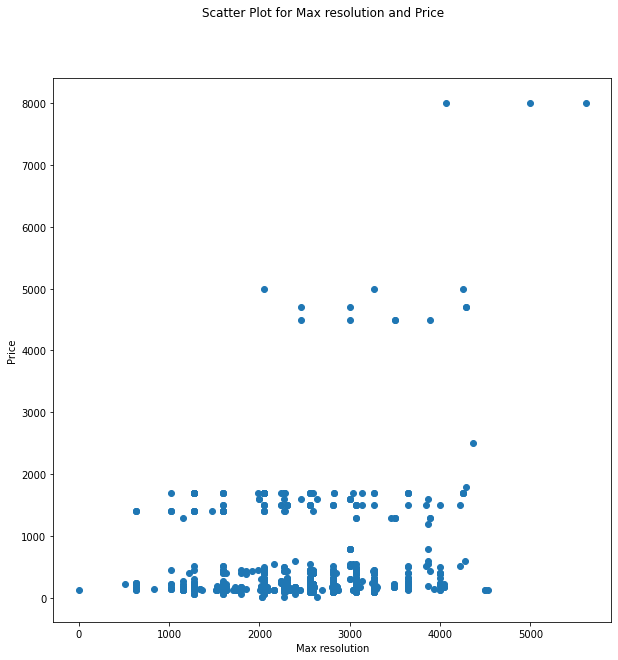

In [20]:
#plotting a cluster for reference
fig = plt.figure(figsize=(10,10))
fig.suptitle('Scatter Plot for Max resolution and Price')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Max resolution')
ax.set_ylabel('Price')
ax.scatter(data_array[:,0],data_array[:,1])

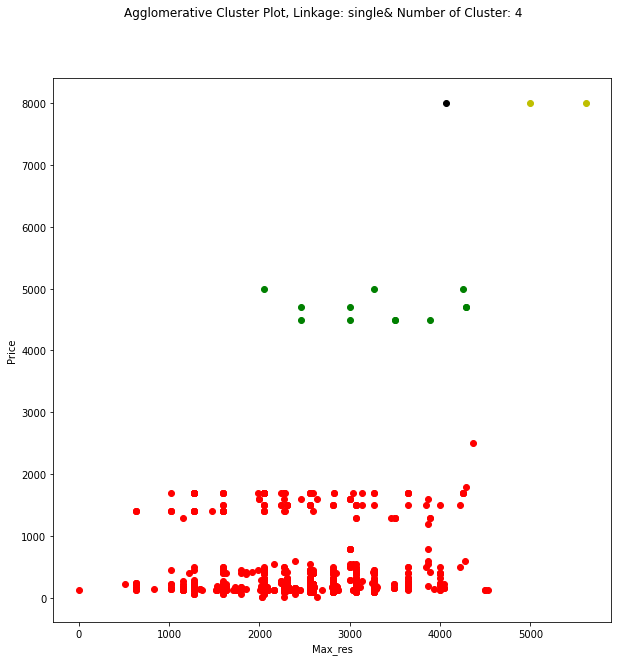

In [21]:
#by refrencing the dendrogram above, lets choose the number of clusters to be 4 with single linkage
agglomerative_clustering(data_array,"single", 4)

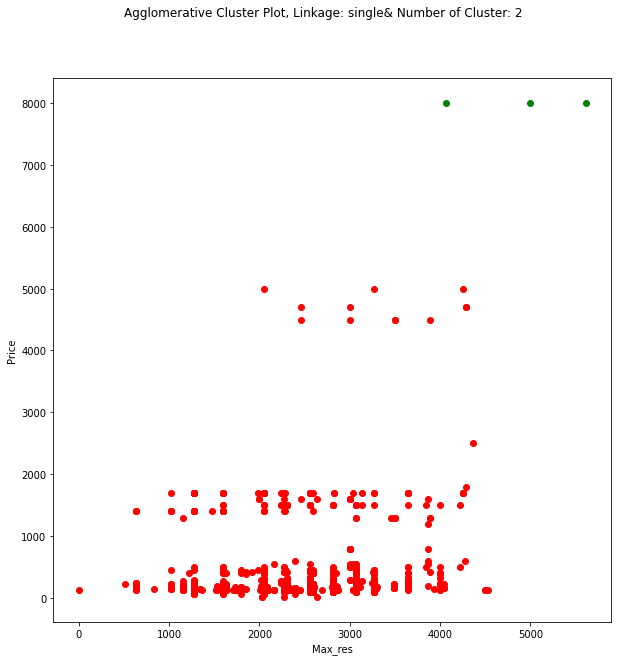

In [22]:
#by refrencing the dendrogram above, lets choose the number of clusters to be 2 with single linkage
agglomerative_clustering(data_array,"single", 2)